In [1]:
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# В notebook можно показать документацию
plt.plot?

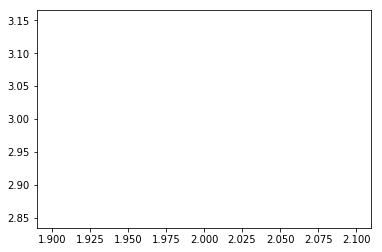

In [3]:
# Как видно было из документации метод plot принимает x, y.
# Попробуем нарисовать точку
plt.plot(2, 3)

# А где точка?

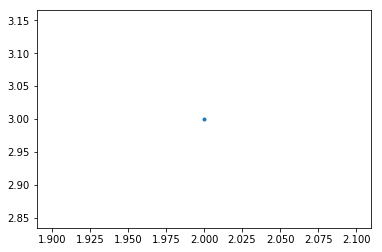

In [4]:
# Нужно указать как мы хотим отображать данные
# В документации нужно внимательно посмотреть на Notes, там примеры форматных строк
plt.plot(2, 3, '.')

In [5]:
# Создаем фигуру / картинку
fig = plt.figure()

# Смотрим что мы получили по умолчанию?
fig

# А ничего не получили, там пусто

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

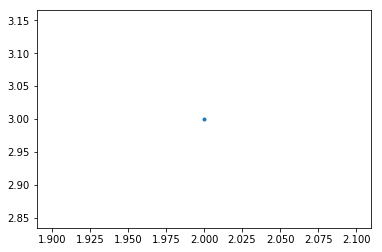

In [6]:
# Добавим оси
ax = fig.add_subplot("111")
ax.plot(2, 3, '.')

fig # это будет значением этой ячейки и notebook знает как его отобразить

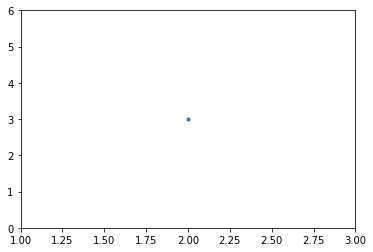

In [7]:
# все что мы пока видели не впечатляет и plt.plot() кажется легче, но у ax.plot() есть свои преимущества
# Добавим ограничения на оси
ax.axis([1, 3, 0, 6]) # ax.axis([ x_min, x_max, y_min, y_max ])

fig

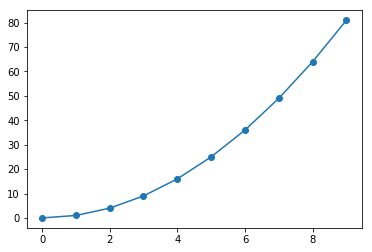

In [8]:
# создадим новый график где будет уже линия
x_vals = [x for x in range(0, 10)]
y_vals = [x**2 for x in x_vals]

fig = plt.figure()
ax = fig.add_subplot("111")
ax.plot(x_vals, y_vals, 'o-')

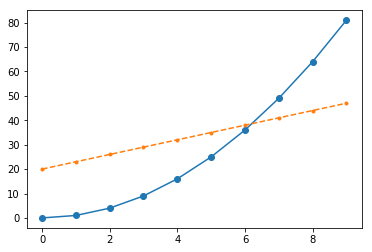

In [9]:
# попробуем создать график где будет несколько линий
x_vals = [ x for x in range(10)  ]
y1_vals = [ x**2  for x in x_vals ]
y2_vals = [ 3*x+20 for x in x_vals ]

fig = plt.figure()
ax = fig.add_subplot("111")
ax.plot(x_vals, y1_vals, 'o-')
ax.plot(x_vals, y2_vals, '.--')

# matplotlib "достаточно умный" чтобы понять что нужн разными цветами рисовать эти линии

In [10]:
# Посмотрим из каких частей состоит наш график
ax.get_children()

# Ух ты! А что это за Text? Кажется это заголовки осей и графика
# В следующей ячейке попробуем задать им значения

 Text(0.5,1,''),
 Text(0,1,''),
 Text(1,1,''),

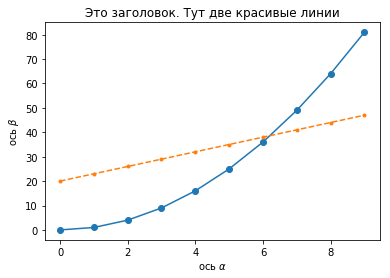

In [11]:
ax.set_title('Это заголовок. Тут две красивые линии')

# Можно делать Latex в заголовках!
ax.set_xlabel(r'ось $\alpha$') # r означает raw string literal т.е. без интерпретации спец символов
ax.set_ylabel(r'ось $\beta$')

fig

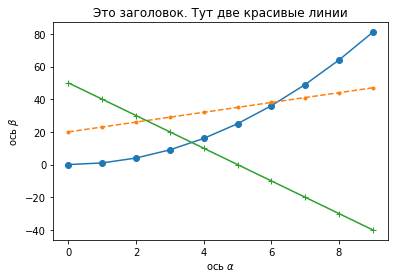

In [12]:
# У отображаемых последовательностей могут быть подписи, которые можно отобразить в легенде
# Создадим еще одну последоваетльность, дадим ей название и отобразим легенду
y3_vals = [ -10*x+50 for x in x_vals ]
ax.plot(x_vals, y3_vals, '+-', label='негативный тренд')

fig

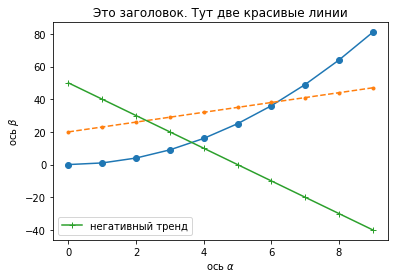

In [16]:
ax.legend(loc='lower left')
fig

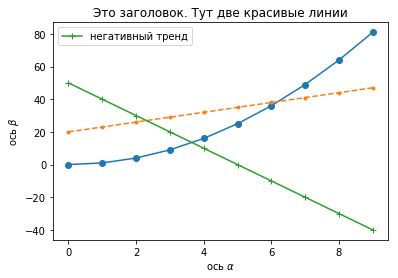

In [35]:
# Вооружившись этими знаниями построим что-нибудь полезное
# Задача нужно загрузить "маленький файл" в DataFrame
# Нужно создать график с точками где x – широта, а y - долгота

import pandas as pd
pd.set_option('max_columns', None)
data = pd.read_csv('./data/earthchem_download_571.txt', sep='\t')
data.head()

,SAMPLE ID,IGSN,SOURCE,REFERENCE,EXPEDITION ID,LATITUDE,LONGITUDE,LOC PREC,MAX ELEVATION,MIN ELEVATION,MIN AGE,AGE,MAX AGE,METHOD,ANALYZED MATERIAL,ROCK TYPE,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,FEOT,MGO,CAO,NA2O,K2O,SR87_SR86,ND143_ND144
0,PETDB-3215-ML-38,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.500,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.61,2.09,13.61,NaN,6.93,10.54,2.14,0.35,NaN,NaN
1,PETDB-3215-R130-7.0,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.7408,-155.050,0.0001,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,THOLEIITE,NaN,45.53,1.78,11.15,NaN,18.99,6.97,1.04,0.09,NaN,NaN
2,JS20017-013,NaN,EARTHCHEMDB,"RHODES, J M, 2015",JS20017-013,19.3768,-155.937,0.0001,-1040.0,-1040.0,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,ALKALI BASALT,NaN,46.81,3.49,15.73,NaN,6.09,8.54,3.59,0.90,NaN,NaN
3,PETDB-3215-ML-259,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.500,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.68,2.08,13.83,NaN,6.88,10.52,2.38,0.38,NaN,NaN
4,MOA9902-002-021,NaN,EARTHCHEMDB,"RHODES, J M, 2015",MOA1999,18.6972,-155.771,0.0001,-3600.0,-3600.0,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,PICRITE,NaN,47.33,1.33,8.67,NaN,21.61,6.89,1.38,0.22,NaN,NaN


In [22]:
# Нас интересуют только колонки с координатами
lat_vals = data['LATITUDE']
lon_vals = data['LONGITUDE']

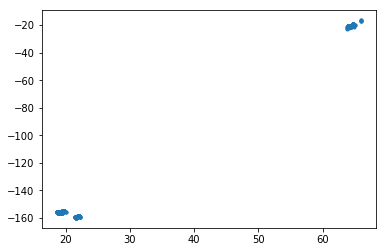

In [23]:
# Строим фигуру
fig = plt.figure()
ax = fig.add_subplot("111")
ax.plot(lat_vals, lon_vals, '.')

In [29]:
# Очевидно что точки можно разбить на два подмножества
# Хочется отобразить их разными цветами

index = lat_vals < 40
lat1_vals = lat_vals[index]
lon1_vals = lon_vals[index]
lat2_vals = lat_vals[~index]
lon2_vals = lon_vals[~index]

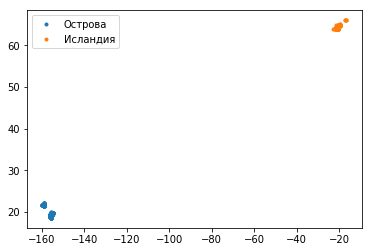

In [33]:
fig = plt.figure()
ax = fig.add_subplot("111")
ax.plot(lon1_vals, lat1_vals, '.', label="Острова")
ax.plot(lon2_vals, lat2_vals, '.', label="Исландия")
ax.legend()

In [36]:
data.head()

,SAMPLE ID,IGSN,SOURCE,REFERENCE,EXPEDITION ID,LATITUDE,LONGITUDE,LOC PREC,MAX ELEVATION,MIN ELEVATION,MIN AGE,AGE,MAX AGE,METHOD,ANALYZED MATERIAL,ROCK TYPE,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,FEOT,MGO,CAO,NA2O,K2O,SR87_SR86,ND143_ND144
0,PETDB-3215-ML-38,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.500,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.61,2.09,13.61,NaN,6.93,10.54,2.14,0.35,NaN,NaN
1,PETDB-3215-R130-7.0,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.7408,-155.050,0.0001,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,THOLEIITE,NaN,45.53,1.78,11.15,NaN,18.99,6.97,1.04,0.09,NaN,NaN
2,JS20017-013,NaN,EARTHCHEMDB,"RHODES, J M, 2015",JS20017-013,19.3768,-155.937,0.0001,-1040.0,-1040.0,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,ALKALI BASALT,NaN,46.81,3.49,15.73,NaN,6.09,8.54,3.59,0.90,NaN,NaN
3,PETDB-3215-ML-259,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.500,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.68,2.08,13.83,NaN,6.88,10.52,2.38,0.38,NaN,NaN
4,MOA9902-002-021,NaN,EARTHCHEMDB,"RHODES, J M, 2015",MOA1999,18.6972,-155.771,0.0001,-3600.0,-3600.0,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,PICRITE,NaN,47.33,1.33,8.67,NaN,21.61,6.89,1.38,0.22,NaN,NaN


In [37]:
# Коррелирует ли содержание SIO2 в базальте от места ?
basalt_index = data['ROCK NAME'] == 'BASALT'
basalt_data = data[basalt_index]
basalt_data.head()

,SAMPLE ID,IGSN,SOURCE,REFERENCE,EXPEDITION ID,LATITUDE,LONGITUDE,LOC PREC,MAX ELEVATION,MIN ELEVATION,MIN AGE,AGE,MAX AGE,METHOD,ANALYZED MATERIAL,ROCK TYPE,ROCK NAME,MINERAL,SIO2,TIO2,AL2O3,FEOT,MGO,CAO,NA2O,K2O,SR87_SR86,ND143_ND144
0,PETDB-3215-ML-38,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.5000,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.61,2.09,13.61,NaN,6.93,10.54,2.14,0.35,NaN,NaN
3,PETDB-3215-ML-259,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.5000,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.68,2.08,13.83,NaN,6.88,10.52,2.38,0.38,NaN,NaN
9,JS20018-006,NaN,EARTHCHEMDB,"RHODES, J M, 2015",JS20018-005,19.4627,-155.9850,0.0001,-1196.0,-1196.0,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.56,2.31,13.67,NaN,6.13,10.31,2.56,0.46,NaN,NaN
10,PETDB-3215-ML-219,NaN,EARTHCHEMDB,"RHODES, J M, 2015",nr,19.3000,-155.5000,0.1000,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,51.00,1.75,12.17,NaN,10.76,9.18,2.03,0.29,NaN,NaN
12,TFH-IT-473,NaN,EARTHCHEMDB,"EASON, D; SINTON, J M, 2009",nr,64.2824,-20.8691,0.0010,NaN,NaN,NaN,NaN,NaN,XRF,WHOLE ROCK,IGNEOUS:VOLCANIC:MAFIC,BASALT,NaN,49.03,1.78,15.46,12.15,8.39,11.49,1.48,0.18,NaN,NaN


In [40]:
sio2_vals = basalt_data['SIO2']
basalt_lon_vals = basalt_data['LONGITUDE']
basalt_lat_vals = basalt_data['LATITUDE']

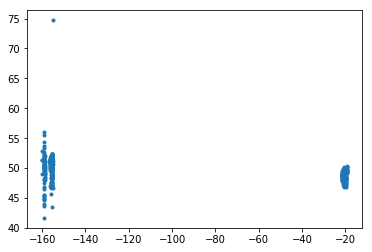

In [43]:
fig = plt.figure()
ax = fig.add_subplot("111")
ax.plot(basalt_lon_vals, sio2_vals, '.')

# Очевидно что в одном из двух мест разброс оксида кремния больше
# А с помощью какого графика убобно оценивать распределение ? Ответ: гистограмма

ValueError: max must be larger than min in range parameter.

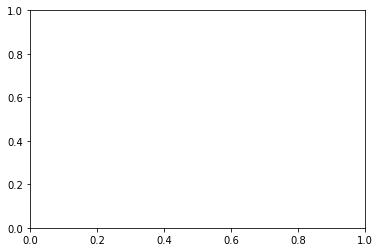

In [59]:
# В matplotlib для гистограммы есть метод который ее строит
fig = plt.figure()
ax = fig.add_subplot("111")
ax.hist(sio2_vals)

# WTF ??? Ой в чем же дело ???

In [54]:
# В отсутствующих значениях дело!
# Нужно такие данные отфильтровать
index = ~sio2_vals.isna()

In [55]:
safe_sio2_vals = basalt_data['SIO2'][index]
safe_basalt_lon_vals = basalt_data['LONGITUDE'][index]
safe_basalt_lat_vals = basalt_data['LATITUDE'][index]

(array([  7.,  94., 541., 178.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([41.67 , 44.975, 48.28 , 51.585, 54.89 , 58.195, 61.5  , 64.805,
        68.11 , 71.415, 74.72 ]),
 <a list of 10 Patch objects>)

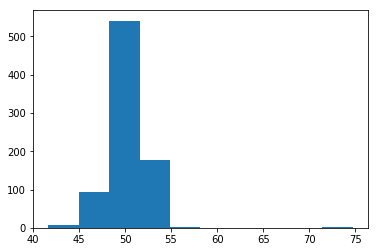

In [60]:
# Попытка номер два
fig = plt.figure()
ax = fig.add_subplot("111")
ax.hist(safe_sio2_vals)

(array([  7.,  94., 541., 178.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([41.67 , 44.975, 48.28 , 51.585, 54.89 , 58.195, 61.5  , 64.805,
        68.11 , 71.415, 74.72 ]),
 <a list of 10 Patch objects>)

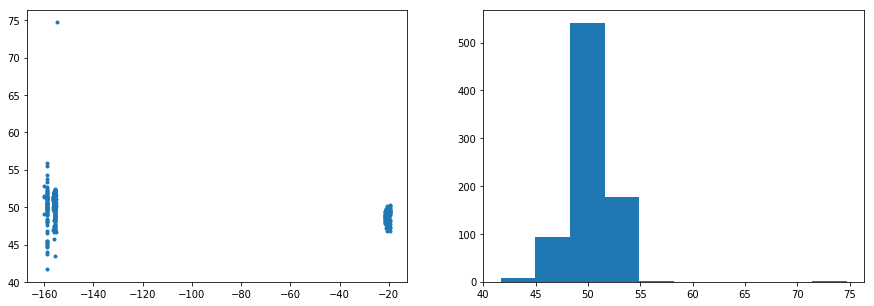

In [65]:
# Так что же такое fig.add_subplot("111") ???
fig = plt.figure() # C помощью help узнать как задать размер картинки figsize=[15, 5]

ax1 = fig.add_subplot("121")
ax1.plot(basalt_lon_vals, sio2_vals, '.')

ax2 = fig.add_subplot("122")
ax2.hist(safe_sio2_vals)

In [66]:
# Последний график в этом сезоне
import cartopy.crs as ccrs

(array([  7.,  94., 541., 178.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([41.67 , 44.975, 48.28 , 51.585, 54.89 , 58.195, 61.5  , 64.805,
        68.11 , 71.415, 74.72 ]),
 <a list of 10 Patch objects>)

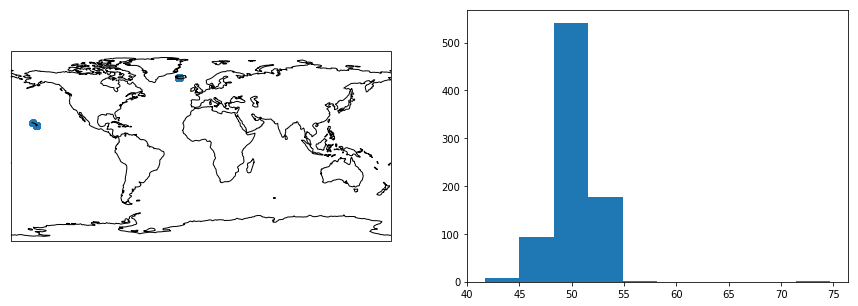

In [67]:
fig = plt.figure(figsize=[15, 5])

ax1 = fig.add_subplot("121", projection = ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.scatter(safe_basalt_lon_vals, safe_basalt_lat_vals)

ax2 = fig.add_subplot("122")
ax2.hist(safe_sio2_vals)

(array([ 3., 10., 10., 29., 38., 31., 17., 15.,  8.,  5.]),
 array([46.8 , 47.15, 47.5 , 47.85, 48.2 , 48.55, 48.9 , 49.25, 49.6 ,
        49.95, 50.3 ]),
 <a list of 10 Patch objects>)

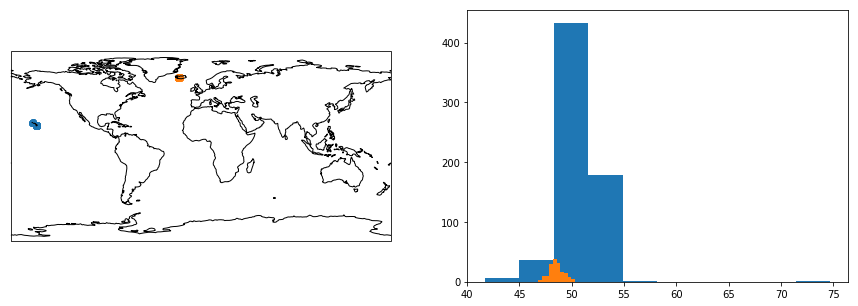

In [70]:
# Первый сложная композиция графиков
index = lon_vals < -100
LON1 = safe_basalt_lon_vals[index]
LAT1 = safe_basalt_lat_vals[index]
LON2 = safe_basalt_lon_vals[~index]
LAT2 = safe_basalt_lat_vals[~index]
SIO2_1 = safe_sio2_vals[index]
SIO2_2 = safe_sio2_vals[~index]

fig = plt.figure(figsize=[15, 5])

ax1 = fig.add_subplot("121", projection = ccrs.PlateCarree())
ax1.set_global()
ax1.coastlines()
ax1.scatter(LON1, LAT1)
ax1.scatter(LON2, LAT2)

ax2 = fig.add_subplot("122")
ax2.hist(SIO2_1)
ax2.hist(SIO2_2)